In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pyobsbox import ObsBoxGenerator

from paths import metadata_folder

# Logging

Set the logging level to debug.

In [2]:
logging.getLogger("pyobsbox").setLevel(logging.DEBUG)

# Metadata

Let's load the metadata.

In [3]:
list(metadata_folder.glob("metadata_*"))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2H_Inst_23528.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_32.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_1024.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1V_Inst_51335.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2V_Inst_60652.h5')]

In [4]:
metadata = metadata_folder / "metadata_B1H_Inst_1024.h5"

In [5]:
meta_df = pd.read_hdf(metadata)

In [6]:
meta_df.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
0,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,0.0,0.0,65536
1,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,550.0,1.0,65536
2,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,650.0,2.0,65536
3,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,750.0,3.0,65536
4,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,850.0,4.0,65536


# Generator

Create the generator.

In [7]:
generator = ObsBoxGenerator(meta_df,
                            n_bunches=1,
                            sequence_length=2048,
                            shuffle=False,
                            normalization="presplit_znorm")

Feb/04 16:09:21 pyobsbox.generator DEBUG: Normalization method: <function ObsBoxGenerator.__init__.<locals>.<lambda> at 0x7fc09ec9fbf8>
Feb/04 16:09:21 pyobsbox.generator INFO: Completing 'batch_size'.
Feb/04 16:09:21 pyobsbox.generator INFO: metadata_path: None
Feb/04 16:09:21 pyobsbox.generator INFO: shuffle: False
Feb/04 16:09:21 pyobsbox.generator INFO: batch_size: 32
Feb/04 16:09:21 pyobsbox.generator INFO: sequence_length: 2048
Feb/04 16:09:21 pyobsbox.generator INFO: n_bunches: 1
Feb/04 16:09:21 pyobsbox.generator INFO: __len__: 369627
Feb/04 16:09:21 pyobsbox.generator INFO: fetched_log_folder: None
Feb/04 16:09:21 pyobsbox.generator INFO: fetched_log_prefix: 
Feb/04 16:09:21 pyobsbox.generator INFO: normalization: presplit_znorm


# Preprocessing steps

In [8]:
subset = generator._create_subset(0)
subset

Feb/04 16:09:22 pyobsbox.generator DEBUG: Subset indices: [0]


,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
0,Inst,6817,1,h,7,2018-06-18 00:26:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/...,12,0.0,0.0,65536


In [9]:
raw = generator._load(subset)
raw.shape

Feb/04 16:09:22 pyobsbox.generator DEBUG: Opening 1 files.
Feb/04 16:09:22 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/instability_data/06817_Inst_B1H_Q7_20180618_00h26m52s.h5
Feb/04 16:09:22 pyobsbox.generator DEBUG: Loading 1 bunches.


(65536, 1)

# normalize before splitting

In [10]:
znorm = raw - raw.mean(axis=0)
znorm = znorm / znorm.std(axis=0)

In [11]:
split = generator._split(znorm.copy())
split.shape

Feb/04 16:09:22 pyobsbox.generator DEBUG: Pre-split: (65536, 1)
Feb/04 16:09:22 pyobsbox.generator DEBUG: Post-split: (32, 2048)


(32, 2048)

The `generator.__getitem__` method does all these steps.

In [12]:
split = np.expand_dims(split, -1)

In [13]:
np.allclose(split, generator[0][0])

Feb/04 16:09:22 pyobsbox.generator DEBUG: Started fetching index 0.
Feb/04 16:09:22 pyobsbox.generator DEBUG: Subset indices: [0]
Feb/04 16:09:22 pyobsbox.generator DEBUG: Opening 1 files.
Feb/04 16:09:22 pyobsbox.generator DEBUG: Opening /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6817/instability_data/06817_Inst_B1H_Q7_20180618_00h26m52s.h5
Feb/04 16:09:22 pyobsbox.generator DEBUG: Loading 1 bunches.
Feb/04 16:09:22 pyobsbox.generator DEBUG: Number of all 0 timeseries: 0
Feb/04 16:09:22 pyobsbox.generator DEBUG: Standard deviation of samples:
array([31.09271389])
Feb/04 16:09:22 pyobsbox.generator DEBUG: Pre-split: (65536, 1)
Feb/04 16:09:22 pyobsbox.generator DEBUG: Post-split: (32, 2048)
Feb/04 16:09:22 pyobsbox.generator DEBUG: Data final shape: (32, 2048, 1)
Feb/04 16:09:22 pyobsbox.generator DEBUG: Finished fetching index 0.


True

# Vizualize raw data

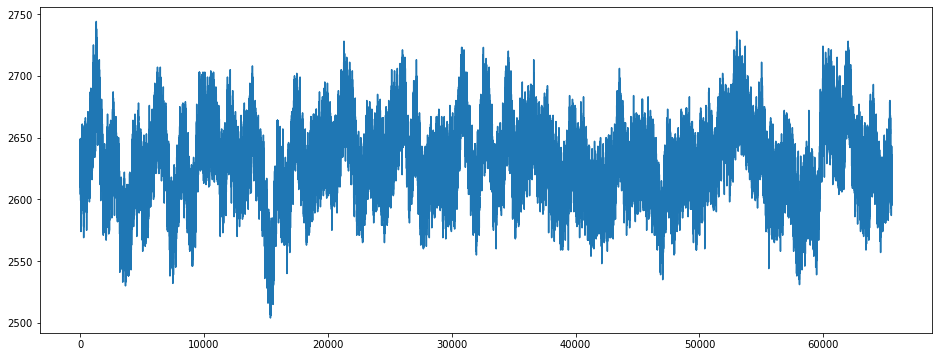

In [14]:
fig = plt.figure(figsize=(16, 6))
plt.plot(raw[:, 0]);

# Vizualize split data

All the splits concatenated, make sure we are not missing anything

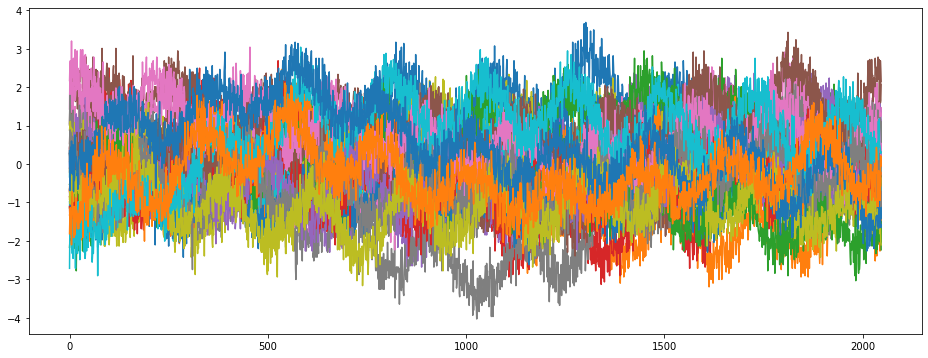

In [15]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(split));

The splits.

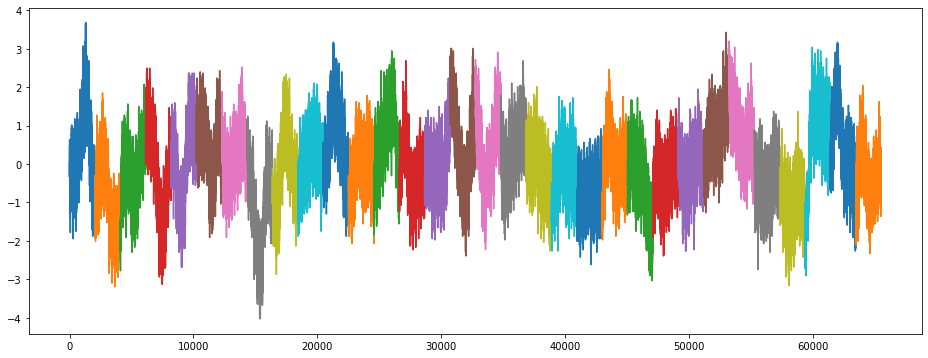

In [16]:
fig = plt.figure(figsize=(16, 6))
for i, data_split in enumerate(split):
    plt.plot(range(i * generator.sequence_length, (i + 1) * generator.sequence_length), data_split)

# Vizualize znorm data

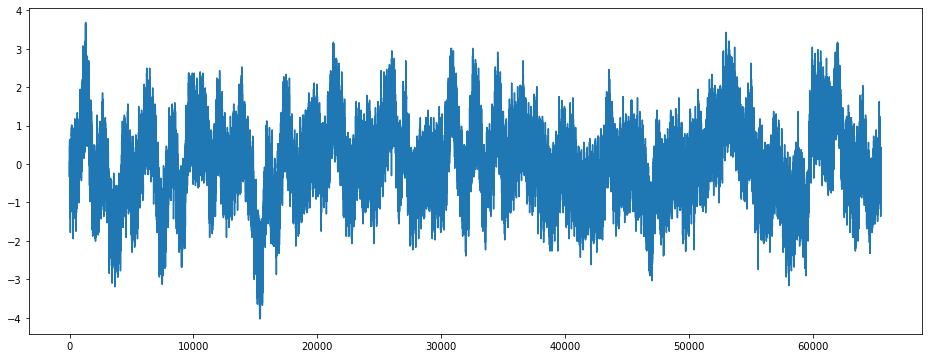

In [17]:
fig = plt.figure(figsize=(16, 6))
plt.plot(np.hstack(split.squeeze()));

Each split of the timeseries should have a mean 0 and std 1.

In [18]:
split.mean(axis=1)

array([[ 0.46279907],
       [-0.86792995],
       [-0.23599934],
       [-0.24908081],
       [ 0.03651288],
       [ 0.51047653],
       [ 0.19623868],
       [-1.17712681],
       [-0.12377827],
       [ 0.16506616],
       [ 0.65036813],
       [-0.12443784],
       [ 0.66117251],
       [-0.16010172],
       [-0.0551045 ],
       [ 0.47647729],
       [ 0.41353549],
       [ 0.31901287],
       [-0.10075614],
       [-0.23398923],
       [-0.82449257],
       [ 0.0405017 ],
       [-0.45213406],
       [-0.32246579],
       [-0.14964282],
       [ 0.86499526],
       [ 0.81720786],
       [-0.46537257],
       [-1.06843914],
       [ 0.75872601],
       [ 0.51531338],
       [-0.27755224]])

In [19]:
split.std(axis=1)

array([[1.05602658],
       [0.95283538],
       [0.79969609],
       [1.15928616],
       [1.09678027],
       [0.80380111],
       [0.71539064],
       [1.07558847],
       [0.97176062],
       [0.68244933],
       [0.88033999],
       [0.69657576],
       [0.84983784],
       [0.82148307],
       [0.72972147],
       [1.08957963],
       [0.91735213],
       [0.73277321],
       [0.73277219],
       [0.68409799],
       [0.59125827],
       [0.73412195],
       [0.88414474],
       [0.66059938],
       [0.67579655],
       [0.77059212],
       [0.79350722],
       [0.6426449 ],
       [0.66108145],
       [1.07207204],
       [1.00131257],
       [0.72734648]])